# InfoVis Notebook

## Einbinden der benötigten Python Module

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

## Einlesen des Covid-CSV Datensatzes mit Pandas

In [2]:
worldData = pd.read_csv("../data/daily-worldwide-covid-data.csv")

## Ausgabe der verfügbaren Spalten

In [3]:
for column in worldData.columns:
    print(column)

iso_code
continent
location
date
total_cases
new_cases
total_deaths
new_deaths
total_cases_per_million
new_cases_per_million
total_deaths_per_million
new_deaths_per_million
total_tests
new_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
tests_units
stringency_index
population
population_density
median_age
aged_65_older
aged_70_older
gdp_per_capita
extreme_poverty
cvd_death_rate
diabetes_prevalence
female_smokers
male_smokers
handwashing_facilities
hospital_beds_per_thousand
life_expectancy


## Ausgabe der verschiedenen Länder

In [4]:
worldData["iso_code"].unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG',
       'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK',
       'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'ETH', 'FRO', 'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB',
       'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM',
       'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM',
       'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'OWID_KOS', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MKD',
       'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX',
       'MDA', '

## Plotten der Deutschland Daten

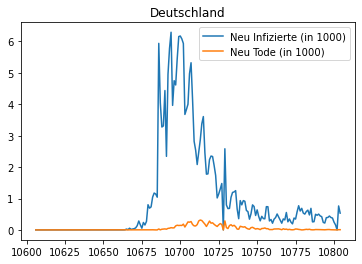

In [5]:
germanyData = worldData.loc[worldData.iso_code == "DEU"]
plt.plot(germanyData.new_cases / 1000)
plt.plot(germanyData.new_deaths / 1000)
plt.title("Deutschland")
plt.legend(["Neu Infizierte (in 1000)", "Neu Tode (in 1000)"])
plt.show();

## Plotten der USA Daten

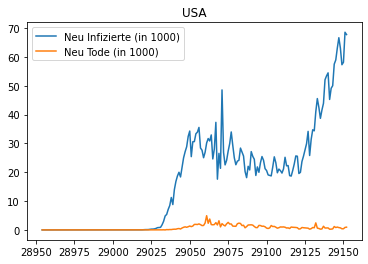

In [6]:
usaData = worldData.loc[worldData.iso_code == "USA"]
plt.plot(usaData.new_cases / 1000)
plt.plot(usaData.new_deaths / 1000)
plt.title("USA")
plt.legend(["Neu Infizierte (in 1000)", "Neu Tode (in 1000)"])
plt.show();

## Extrahieren der benötigten Datenspalten

In [7]:
extractedWorldData = worldData[["iso_code", "location", "date", "new_cases"]]
extractedWorldData

,iso_code,location,date,new_cases
0,AFG,Afghanistan,2019-12-31,0.0
1,AFG,Afghanistan,2020-01-01,0.0
2,AFG,Afghanistan,2020-01-02,0.0
3,AFG,Afghanistan,2020-01-03,0.0
4,AFG,Afghanistan,2020-01-04,0.0
...,...,...,...,...
30636,NaN,International,2020-02-28,0.0
30637,NaN,International,2020-02-29,0.0
30638,NaN,International,2020-03-01,0.0
30639,NaN,International,2020-03-02,0.0


## Einträge entfernen, die NaN enthalten

In [8]:
extractedWorldData = extractedWorldData.dropna()
extractedWorldData

,iso_code,location,date,new_cases
0,AFG,Afghanistan,2019-12-31,0.0
1,AFG,Afghanistan,2020-01-01,0.0
2,AFG,Afghanistan,2020-01-02,0.0
3,AFG,Afghanistan,2020-01-03,0.0
4,AFG,Afghanistan,2020-01-04,0.0
...,...,...,...,...
30572,OWID_WRL,World,2020-07-12,218178.0
30573,OWID_WRL,World,2020-07-13,195282.0
30574,OWID_WRL,World,2020-07-14,190094.0
30575,OWID_WRL,World,2020-07-15,220248.0


## Exportieren des extrahierten und gesäuberten Datasets

In [9]:
extractedWorldData.to_csv("../web/data/covid-data.csv", index = False)